# TP Spline

## Questions préliminaires

***QP 1 à 3*** cf feuilles avec préparation du TP

***QP4***


***QP5***

## Questions du TP

***Q1***

In [28]:
f = open("Motorcycledata.txt")
t = []
Y = []
for line in f.readlines():
    t.append(float(line.split()[1]))
    Y.append(float(line.split()[2]))
t_cleaned = []
m = []
Y_cleaned = []
for i in range(len(t)):
    time = t[i]
    if time not in t_cleaned :
        t_cleaned.append(time)
        m.append(1)
        Y_cleaned.append(Y[i])
    else : 
        Y_cleaned[-1] = (Y_cleaned[-1] * m[-1] + Y[i]) / (m[-1] + 1)
        m[-1] += 1
f.close()

***Q2***

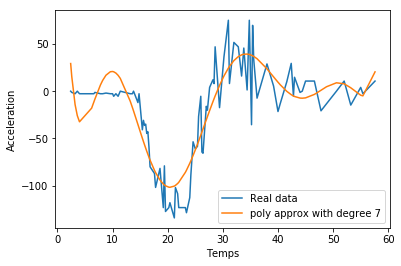

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
score = []
Y_pred = []
for deg in range(94):
    M = []
    for i in range(deg+1):
        M.append([t**i for t in t_cleaned])

    X_reg = np.array(M).T
    Y_reg = np.array(Y_cleaned)
    reg = LinearRegression(fit_intercept=False).fit(X_reg, Y_reg)
    score.append(reg.score(X_reg, Y_reg))
    Y_pred.append(reg.predict(X_reg))

plt.plot(t_cleaned, Y_cleaned, label="Real data")
plt.plot(t_cleaned, Y_pred[np.argmax(score)], label="poly approx with degree %s" % (np.argmax(score)-1))
plt.xlabel("Temps")
plt.ylabel("Acceleration")
plt.legend(loc="best")
plt.show()

***Q3***

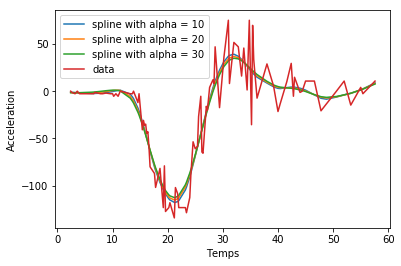

In [44]:
t = t_cleaned
n = len(t)
h = []
for i in range(n-1):
    h.append(t[i+1]-t[i])

Q = np.zeros((n,n-2))

for j in range(n-2):
    Q[j,j] = 1/h[j]
    Q[j+1,j] = -1/h[j] - 1/h[j+1]
    Q[j+2,j] = 1/h[j+1]

R = np.zeros((n-2,n-2))
for j in range(n-2):
    R[j,j] = 1/3 * (h[j]+h[j+1])
    if j<n-3:
        R[j+1,j] = 1/6*h[j+1]
        R[j,j+1] = 1/6*h[j+1]

K = np.dot(np.dot(Q, np.linalg.inv(R)), Q.T)

W = np.diag(m)

alpha = [10,20,30]
for a in alpha:
    Y_pred = np.dot(np.dot(np.linalg.inv(W+a*K), W), Y_cleaned)
    plt.plot(t, Y_pred, label="spline with alpha = %s" % a)
    plt.xlabel("Temps")
    plt.ylabel("Acceleration")

plt.plot(t, Y_cleaned, label="data")
plt.legend(loc="best")
plt.show()

Nous pouvons voir que l'approximation est bien meilleure par rapport à une régression polynomiale.

***Q4***

In [58]:
from time import time
def CV(alpha):
    A = np.dot(np.linalg.inv(W+alpha*K), W)
    return np.sum(np.dot(W,((Y_cleaned - np.dot(A,Y_cleaned))/np.diag(np.eye(n)-A))**2))

t0 = time()
cv = [CV(alpha) for alpha in range(1,101)]
alpha_min = np.argmin(cv)+1
print("alpha min = %s" % alpha_min)
print("temps de calcul : %s" % (time()-t0))

alpha min = 15
temps de calcul : 0.07479739189147949


***Q5***

In [59]:
def GCV(alpha):
    A = np.dot(np.linalg.inv(W+alpha*K), W)
    return np.sum(np.dot(W, (Y_cleaned - np.dot(A,Y_cleaned))**2))/((1-1/n*np.sum(np.diag(A)))**2)

t0 = time()
gcv = [GCV(alpha) for alpha in range(1,101)]
alpha_min = np.argmin(cv)+1
print("alpha min = %s" % alpha_min)
print("temps de calcul : %s" % (time()-t0))

alpha min = 15
temps de calcul : 0.05385446548461914


Nous pouvons voir que la méthode de validation croisée généralisée donne le même résultat que la méthode de validation classique, en revanche elle a l'avantage d'être un peu plus rapide.

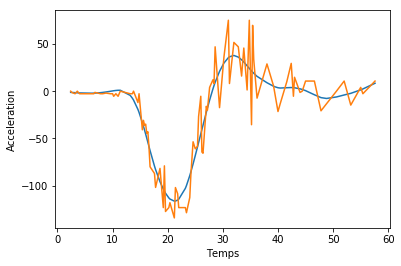

In [61]:
# Spline with the best alpha

Y_pred = np.dot(np.dot(np.linalg.inv(W+15*K), W), Y_cleaned)
plt.plot(t, Y_pred, label="spline")
plt.plot(t, Y_cleaned, label="data")
plt.xlabel("Temps")
plt.ylabel("Acceleration")
plt.show()